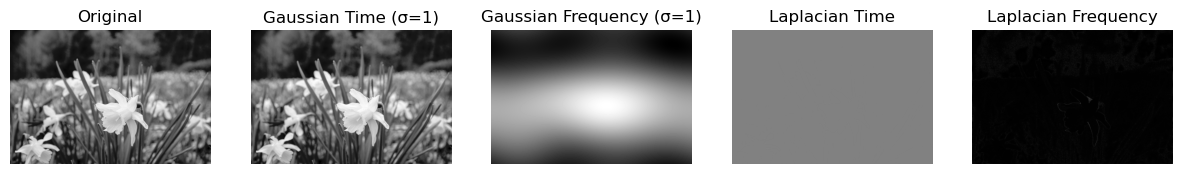

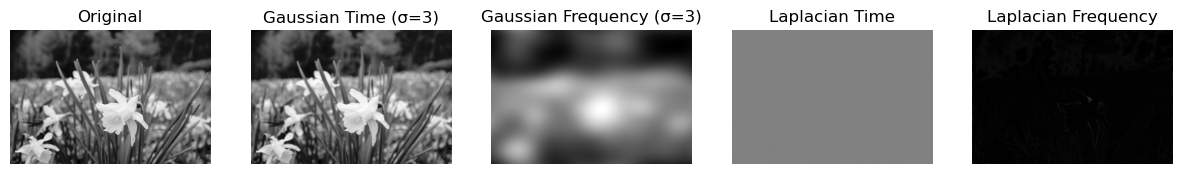

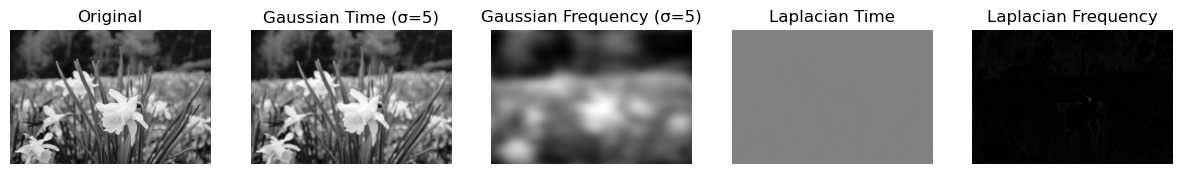

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

# تابعی برای نمایش تصاویر
def show_images(images, titles, cmap='gray'):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(image, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

# بارگذاری تصویر
image_path = '5.jpg'  # مسیر تصویر خود را قرار دهید
image = cv2.imread(image_path, 0)

# اعمال فیلتر گوسی در حوزه زمان
def gaussian_filter_time(image, sigma):
    return cv2.GaussianBlur(image, (0, 0), sigma)

# اعمال فیلتر گوسی در حوزه فرکانس
def gaussian_filter_frequency(image, sigma):
    dft = fft2(image)
    dft_shifted = fftshift(dft)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    x, y = np.meshgrid(x, y)
    
    gaussian_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    dft_shifted_filtered = dft_shifted * gaussian_kernel
    dft_filtered = ifftshift(dft_shifted_filtered)
    
    filtered_image = np.abs(ifft2(dft_filtered))
    return filtered_image

# اعمال فیلتر الپالسی در حوزه زمان
def laplacian_filter_time(image):
    return cv2.Laplacian(image, cv2.CV_64F)

# اعمال فیلتر الپالسی در حوزه فرکانس
def laplacian_filter_frequency(image):
    dft = fft2(image)
    dft_shifted = fftshift(dft)
    
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2

    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    x, y = np.meshgrid(x, y)
    
    laplacian_kernel = -(x**2 + y**2)
    
    dft_shifted_filtered = dft_shifted * laplacian_kernel
    dft_filtered = ifftshift(dft_shifted_filtered)
    
    filtered_image = np.abs(ifft2(dft_filtered))
    return filtered_image

# اعمال فیلترها و نمایش نتایج
sigmas = [1, 3, 5]

for sigma in sigmas:
    gaussian_time = gaussian_filter_time(image, sigma)
    gaussian_frequency = gaussian_filter_frequency(image, sigma)
    
    laplacian_time = laplacian_filter_time(image)
    laplacian_frequency = laplacian_filter_frequency(image)
    
    show_images(
        [image, gaussian_time, gaussian_frequency, laplacian_time, laplacian_frequency],
        ['Original', f'Gaussian Time (σ={sigma})', f'Gaussian Frequency (σ={sigma})', 'Laplacian Time', 'Laplacian Frequency']
    )
